In [36]:
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols,plot,solve,symbol

# Loads

Point loads and moments

In [ ]:
#point load
b.apply_load(magnitude,location,-1)

#point moment
b.apply_load(magnitude,location,-2)


Constant distributed load

In [ ]:
b.apply_load(magnitude,start,0)
b.apply_load(-magnitude,stop,0)

Triangular load

In [ ]:
#left triangular load
b.apply_load(magnitude,start,0)
b.apply_load(-magnitude/length,start,1)
b.apply_load(magnitude/length,end,1)

#right triangular load
b.apply_load(magnitude/length,start,1)
b.apply_load(-magnitude,end,0)
b.apply_load(-magnitude/length,end,1)


# Defining

In [37]:
#E and I values
E,I,x,w,L = symbols("E I x w L")
#E = 70e9
#I = 2.485e-9


#Beam
length_of_beam = 2*L
b = Beam(length_of_beam,E,I)

#applying known loads


#applying unknown loads
R1, R2, M0 = symbols("A R1 R2 M0")

b.apply_load(A,0,-1)

b.apply_load(M0,0,-2)



# Solving

Reactions

In [39]:
b.solve_for_reaction_loads(R1,M0)
b.reaction_loads

{R1: 14.6602500000000, M0: -49.6410000000000}

Load intensity q

In [40]:
#q
b.load

-49.641*SingularityFunction(x, 0, -2) + 14.66025*SingularityFunction(x, 0, -1) - 2*SingularityFunction(x, 1, 0) - 8.66025*SingularityFunction(x, 4, -1)

Shear Force Fxy

In [41]:
#Fxy
-b.shear_force()

49.641*SingularityFunction(x, 0, -1) - 14.66025*SingularityFunction(x, 0, 0) + 2*SingularityFunction(x, 1, 1) + 8.66025*SingularityFunction(x, 4, 0)

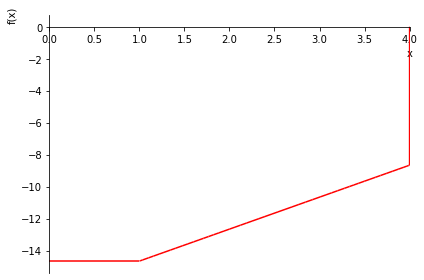

In [45]:
plot(-b.shear_force(),(symbols("x"),0,length_of_beam),xlim=(0,length_of_beam),line_color="r")

In [44]:
location = 1
-b.shear_force().subs(x,location)

-14.6602500000000

Moment

In [42]:
b.bending_moment()

-49.641*SingularityFunction(x, 0, 0) + 14.66025*SingularityFunction(x, 0, 1) - SingularityFunction(x, 1, 2) - 8.66025*SingularityFunction(x, 4, 1)

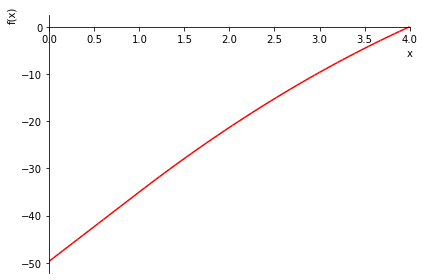

In [46]:
plot(b.bending_moment(),(symbols("x"),0,length_of_beam),xlim=(0,length_of_beam),line_color="r")

In [43]:
location = 1
b.bending_moment().subs(x,location)

-34.9807500000000

# Boundary conditions

Input boundary conditions

In [83]:
#slope
#b.bc_slope = [(location,value),(location,value)]
#b.bc_slope = [(1,0),(3,0)]


#deflection
#b.bc_deflection = [(location,value),(location,value)]
b.bc_deflection = [(0,0), (1.5,-0.0202)]


Slope

In [84]:
b.slope()

(-5*SingularityFunction(x, 0, 2) + 20*SingularityFunction(x, 1.5, 2) - 15*SingularityFunction(x, 2, 2) + 3.73653333333333)/(E*I)

In [80]:
b.slope().subs(x,location)

-11.2365333333333/(E*I)

Deflection

In [85]:
b.deflection()

(3.73653333333333*x - 5*SingularityFunction(x, 0, 3)/3 + 20*SingularityFunction(x, 1.5, 3)/3 - 5*SingularityFunction(x, 2, 3))/(E*I)

In [86]:
location = 2.5
b.deflection().subs(x,location)

-10.6586666666667/(E*I)

In [81]:
b.plot_loading_results

<bound method Beam.plot_loading_results of <sympy.physics.continuum_mechanics.beam.Beam object at 0x00000223E54C51F0>>